In [1]:
import pandas as pd

inr = pd.read_csv('insuranceLiner.csv')

inr.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [2]:
inr.shape

(1338, 7)

In [4]:
inr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
inr.columns[inr.isnull().sum() > 0]

Index([], dtype='object')

In [6]:
inr.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
inr.sex.value_counts()

male      676
female    662
Name: sex, dtype: int64

In [9]:
inr.smoker.value_counts()
inr.region.value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [65]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [66]:
inr.sex = le.fit_transform(inr.sex)
inr.smoker =  le.fit_transform(inr.smoker)
inr.region = le.fit_transform(inr.region)

In [67]:
inr.sex.value_counts()
inr.smoker.value_counts()
inr.region.value_counts()

2    364
1    325
3    325
0    324
Name: region, dtype: int64

In [68]:
inr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int32  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int32  
 5   region    1338 non-null   int32  
 6   charges   1338 non-null   float64
dtypes: float64(2), int32(3), int64(2)
memory usage: 57.6 KB


In [69]:
from sklearn.model_selection import train_test_split

inr_train,  inr_test = train_test_split(inr, test_size=.2)

In [70]:
inr_train_x = inr_train.iloc[ : , 0: -1]
inr_train_y = inr_train.iloc[ : , -1]

In [71]:
inr_test_x = inr_test.iloc[ : , 0: -1]
inr_test_y = inr_test.iloc[ : , -1]

In [72]:
from sklearn.linear_model import LinearRegression

reg_inr = LinearRegression()

reg_inr.fit(inr_train_x, inr_train_y)

LinearRegression()

In [73]:
Rsquare = reg_inr.score(inr_train_x, inr_train_y)
Rsquare

0.7517038623947502

In [74]:
N = inr_train_x.shape[0]
K = inr_train_x.shape[1]

AdjRsquare = 1 - (1-Rsquare)*(N-1)/(N-K-1)
AdjRsquare

0.7503023790216256

In [75]:
pred_train = reg_inr.predict(inr_train_x)
pred_test = reg_inr.predict(inr_test_x)

In [76]:
err_train = inr_train_y - pred_train
err_test = inr_test_y - pred_test

In [77]:
import numpy as np
np.mean(err_train)

5.125470141767063e-13

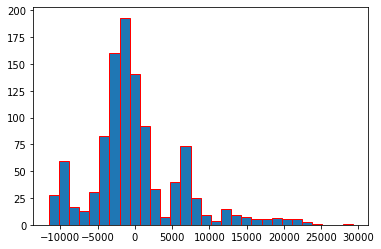

In [78]:
import matplotlib.pyplot as plt

plt.hist(err_train, bins =30, edgecolor='r');

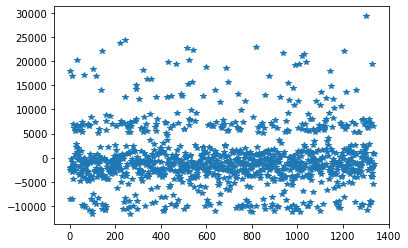

In [79]:
plt.plot(err_train, "*");

In [80]:
pred_actual = pd.DataFrame({'Actual': inr_train_y, 'Predict' : pred_train})

D:\DataScience_Utilities\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


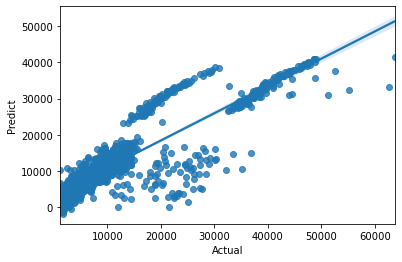

In [81]:
import seaborn as sns

sns.regplot('Actual', 'Predict', data=pred_actual);

In [82]:
def remove_outliers(df,   col,  k):   
        mean = df[col].mean()
        global df1  # output 
        sd = df[col].std()    
        final_list = [x for x in df[col] if (x > mean - k * sd)]
        final_list = [x for x in final_list if (x < mean + k * sd)]       
        df1 = df.loc[df[col].isin(final_list)] ; print(df1.shape)     
        print("Number of outliers removed == >"   ,  df.shape[0]  - df1.shape[0])

In [83]:
remove_outliers(inr, 'charges', 2)

(1231, 7)
Number of outliers removed == > 107


In [84]:
inr = df1

In [85]:
from sklearn.model_selection import train_test_split

inr_train,  inr_test = train_test_split(inr, test_size=.2)

In [86]:
inr_train_x = inr_train.iloc[ : , 0: -1]
inr_train_y = inr_train.iloc[ : , -1]

In [87]:
inr_test_x = inr_test.iloc[ : , 0: -1]
inr_test_y = inr_test.iloc[ : , -1]

In [88]:
from sklearn.linear_model import LinearRegression

reg_inr = LinearRegression()

reg_inr.fit(inr_train_x, inr_train_y)

LinearRegression()

In [89]:
Rsquare = reg_inr.score(inr_train_x, inr_train_y)
Rsquare

0.6139821022652135

In [91]:
N = inr_train_x.shape[0]
K = inr_train_x.shape[1]

AdjRsquare = 1 - (1-Rsquare)*(N-1)/(N-K-1)
AdjRsquare

0.6116114703446314

In [90]:
pred_train = reg_inr.predict(inr_train_x)
pred_test = reg_inr.predict(inr_test_x)

In [92]:
err_train = inr_train_y - pred_train
err_test = inr_test_y - pred_test

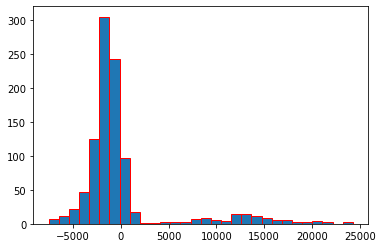

In [93]:
import matplotlib.pyplot as plt

plt.hist(err_train, bins =30, edgecolor='r');

D:\DataScience_Utilities\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


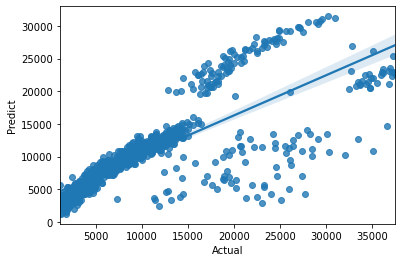

In [95]:
pred_actual = pd.DataFrame({'Actual': inr_train_y, 'Predict' : pred_train})

import seaborn as sns

sns.regplot('Actual', 'Predict', data=pred_actual);

In [ ]:
# Calculate the MAPE to see what  % of erros are existing